<a href="https://colab.research.google.com/github/yechoi/mygpt-lecture/blob/main/Copy_of_mygpt_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 2: 실습용 github 코드 클론
import os
!git clone https://github.com/oglee815/mygpt-lecture.git


### Stage 1. 원하는 도메인에 특화된 대화 모델 만들기

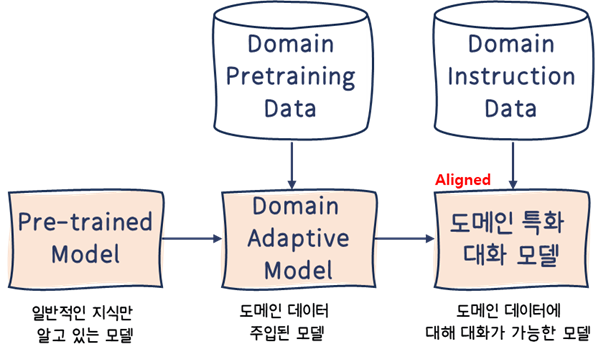


#### 1-1 Domain Adaptive Pretraining 데이터 만들기

- 방법: Namuwiki에서 특정 주제를 선택하고, 질문과 답변을 생성 후, *'data/stage1. domain_adaptive_pretraining/도메인_주제.csv'*로 업로드

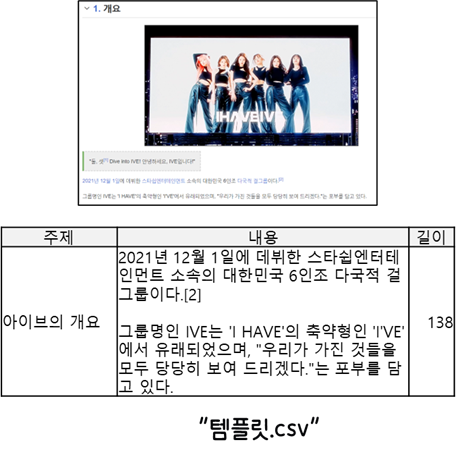

In [ ]:
# 3: 직접 만든 Pre-training 데이터 읽기(csv 파일)

import pandas as pd
data = pd.read_csv("./mygpt-lecture/data/stage1. domain_adaptive_pretraining/아이브.csv") # 아이브.csv -> 본인이 만든 파일 위치로 수정

In [ ]:
# 4: 데이터 살펴보기
data.head()

주제                                                 내용   길이
0    아이브의 개요  2021년 12월 1일에 데뷔한 스타쉽엔터테인먼트 소속의 대한민국 6인조 다국적 걸...  138
1    아이브의 멤버                           안유진, 가을, 레이, 장원영, 리즈, 이서   24
2  아이브의 콘셉트1  청순 콘셉트를 지나 다시금 걸 크러시 콘셉트가 트렌드로 돌아온 4세대 걸그룹답게 I...  405
3  아이브의 콘셉트2  사실 이 차별화는 현재 걸크러시 콘셉트로 활동하는 걸그룹 대부분에게 해당되는 말이긴...  380
4  아이브의 콘셉트3  연타석 홈런을 친 데뷔 싱글 1집 타이틀곡 <ELEVEN>과 싱글 2집 타이틀곡 <...  269

In [ ]:
# 5: 데이터 갯수 찍어보기
print(len(data))

25


In [ ]:
# 6: 데이터 전처리

# 주제만 가지고 학습을 위한 Prompt 형식으로 변환합니다.
def prompting(topic):
    return f"다음 주제에 대하여, 위키피디아에 있는 정보를 어떠한 수정 없이 그대로 복원해주세요.\n주제:{topic}\n"

# 학습에 사용되는 포맷인 jsonl 타입으로 변경합니다
instruction = []
for a in data.iterrows():
    topic = a[1]['주제']
    output = a[1]['내용']
    instruction.append({'instruction': prompting(topic), 'output': output})

print(instruction[0]['instruction'])
print("--"*10)
print(instruction[0]['output'])

다음 주제에 대하여, 위키피디아에 있는 정보를 어떠한 수정 없이 그대로 복원해주세요.
주제:아이브의 개요

--------------------
2021년 12월 1일에 데뷔한 스타쉽엔터테인먼트 소속의 대한민국 6인조 다국적 걸그룹이다.[2]

그룹명인 IVE는 'I HAVE'의 축약형인 'I'VE'에서 유래되었으며, "우리가 가진 것들을 모두 당당히 보여 드리겠다."는 포부를 담고 있다.


In [ ]:
# 7: 파일 저장
import json
# 반드시 이름 수정!!
with open("./mygpt-lecture/data/stage1. domain_adaptive_pretraining/domain_adaptive_pretrain_ive.jsonl" , encoding= "utf-8",mode="w") as file:
	for i in instruction: file.write(json.dumps(i, ensure_ascii=False) + "\n")

#### 1-2 General KoGPT2 모델 테스트

In [ ]:
# 8: 필수 라이브러리 설치 (< 5 mins, Dependency 에러 무시)
# 세션 재시작하라는 메시지 뜨면 세션 재시작

!pip install -r ./mygpt-lecture/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.7/686.7 kB 62.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.5/325.5 kB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.0/396.0 kB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 69.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 71.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.3/204.3 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/

In [ ]:
# 9: 필요 라이브러리 import

import torch
import torch.nn as nn
from torch.utils.data import Dataset
from datasets import load_dataset
import transformers
from transformers import AutoTokenizer, AutoConfig, AutoModelForCausalLM, pipeline, PreTrainedTokenizerFast, Trainer, TrainingArguments
from copy import deepcopy
from torch.optim import Adam
import pandas as pd
import argparse
import copy
import logging
import json
from dataclasses import dataclass, field

import sys
CODE_PATH="./mygpt-lecture/code/"
if CODE_PATH not in sys.path:
    sys.path.append(CODE_PATH)

from utils import SFT_dataset, DataCollatorForSupervisedDataset
from typing import Optional, Dict, Sequence
import jsonlines

In [ ]:
# 10: Vanila KoGPT 모델 로드

tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2",
                                                    bos_token='</s>', eos_token='</s>', unk_token='<unk>',
                                                    pad_token='<pad>', mask_token='<mask>',
                                                    padding_side="right", model_max_length=512)

model = AutoModelForCausalLM.from_pretrained('skt/kogpt2-base-v2').to('cuda')

print(tokenizer.tokenize("안녕하세요. 한국어 GPT-2 입니다.😤:)l^o"))

tokenizer.json:   0%|          | 0.00/2.83M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


pytorch_model.bin:   0%|          | 0.00/513M [00:00<?, ?B/s]

['▁안녕', '하', '세', '요.', '▁한국어', '▁G', 'P', 'T', '-2', '▁입', '니다.', '😤', ':)', 'l^o']


In [ ]:
# 11: Vanila Model의 추론 테스트

generator_skt_gpt = pipeline('text-generation', model=model, tokenizer=tokenizer, device=model.device)

generation_args = dict(
    num_beams=4,
    repetition_penalty=2.0,
    no_repeat_ngram_size=4,
    eos_token_id=tokenizer.eos_token_id,
    max_new_tokens=256,
    do_sample=True,
    top_k=50,
    early_stopping=True
)

list_prompt = [ '동해물과 백두산이', '불고기 요리 만드는 방법 알려줘']

list_result = generator_skt_gpt(list_prompt, **generation_args)
for prompt, result in zip(list_prompt, list_result):
    print('#'*70)
    print("[질문]:\n" + prompt)
    print('[답변]:\n' + result[0]['generated_text'].replace(prompt, ""))

######################################################################
[질문]:
동해물과 백두산이
[답변]:
 만나는 곳에 위치하고 있어 천혜의 자연환경을 자랑하고 있다.
또한 지리산 자락인 지리산과 섬진강을 끼고 있는 지리적 이점을 살려 사계절 내내 산행할 수 있는 곳으로 각광받고 있다.
지리산국립공원사무소 관계자는 “지리산국립공원의 자연환경이 잘 보존돼 있어 많은 관광객들이 찾을 것으로 예상된다”며 “지리산 국립공원 탐방로 이용 시 안전사고에 각별히 유의해야 한다”고 당부했다. 서울고법 형사3부(부장판사 최재형)는 29일 특정범죄 가중처벌 등에 관한 법률 위반(뇌물) 등 혐의로 기소된 김 전 차관에 대한 항소심에서 1심과 같이 징역 1년6개월을 선고했다.
재판부는 "김 전 차관의 혐의는 유죄로 인정된다"면서도 "다만 일부 혐의를 유죄로 인정한 원심 판단은 정당하다"고 판단했다.
김 전 차관은 지난 2017년 7월~2018년 8월 박근혜 정부 당시 청와대 민정수석실 산하 공직기강비서관실 행정관으로 근무하면서 정윤회씨의 국정개입 의혹에 대해 감찰을 지시한 혐의 등으로 재판에 넘겨졌다.
1심은 김 전 차관에게 징역 1년에 집행유예 2년, 추징금 3억원을 선고했다.
그러나 2심은 "공직기강이 해이해진 측면이 있었다"며 무죄를 선고
######################################################################
[질문]:
불고기 요리 만드는 방법 알려줘
[답변]:
야겠네요.
네. 네. 자~ 오늘은 어떤 요리를 만들어야 할까요.
자~ 먼저 첫 번째 재료부터 소개해주시죠.
먼저 파프리카를 준비해봤는데요.
파프리카가 듬뿍 들어있어요.
어~ 어~ 그래서 파프리카는 정말 맛있을 것 같은데요.
음~ 이 파프리카를 한 번에 다 먹을 수 있는 방법은 없을까요?
음~ 음~ 예. 이렇게 파프리카를 잘게 썰어주세요.
음~ 그리고 파프리카를 으깨서 볶아줄게요.
음~ 그다음에 양파도 넣

#### 1-3 사전 학습 + General 도메인에 대한 대화 데이터 학습이 끝난 모델 테스트

General instruction fine-tuned model

In [ ]:
# 12: General Instruction Model 로드
tokenizer = PreTrainedTokenizerFast.from_pretrained("hyunjae/skt-kogpt2-kullm-v2",
                                                    bos_token='</s>', eos_token='</s>', unk_token='<unk>',
                                                    pad_token='<pad>', mask_token='<mask>',
                                                    padding_side="right", model_max_length=512)

model = AutoModelForCausalLM.from_pretrained('hyunjae/skt-kogpt2-kullm-v2').to('cuda')

tokenizer.json:   0%|          | 0.00/2.83M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

In [ ]:
# 13: General Instruction Model 추론 테스트
generator_general_model = pipeline('text-generation', model=model, tokenizer=tokenizer, device=model.device)

generation_args = dict(
    num_beams=4,
    repetition_penalty=2.0,
    no_repeat_ngram_size=4,
    eos_token_id=tokenizer.eos_token_id,
    max_new_tokens=256,
    do_sample=True,
    top_k=50,
    early_stopping=True
)

list_prompt = ['동해물과 백두산이', '불고기 요리 만드는 방법 알려줘']

#### 학습때 사용한 프롬프트 형태대로 입력 필수 ####
PROMPT= "### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.\n### 사용자:{instruction}\n### 응답:"
prompt_list = [ PROMPT.format_map({'instruction':x}) for x in list_prompt]

list_result = generator_general_model(prompt_list, **generation_args)
for prompt, result in zip(prompt_list, list_result):
    print('#'*70)
    print("[질문]:\n" + prompt)
    print('[답변]:\n' + result[0]['generated_text'].replace(prompt, ""))

######################################################################
[질문]:
### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:동해물과 백두산이
### 응답:
[답변]:
물론이죠! 다음은 "백두산"과 "천두산"의 차이점을 요약한 것입니다:1. 이름: "백두산은 지구상에서 가장 높은 봉우리입니다."설명: 백두산은 지구 주위를 공전하는 두 개의 지구 대기권입니다. 반면 산은 지구 궤도를 공전하는 세 개의 지구 대기권으로 구성되어 있습니다.2. 나이: '백두산은 45세 이상이어야 합니다.'설명: 백두의산은 45세 이상의 성인으로 간주되며 일반적으로 나이가 50세에서 60세 사이여야 합니다.3. 둘레: 백두산의 길이는 약 36.4km입니다.4. 표면 상태: 백두산에 비해 백두산은 더 얇고 얇습니다.5. 위치: 백두산은 해발 고도에 따라 고도가 약간 달라질 수 있습니다. 예를 들어, 해발 고도는 섭씨 21도부터 29도까지 다양할 수 있습니다.6. 기후: 백두산과 백두산은 기후가 다릅니다. 백두산은 덥고 건조한 반면, 백두산은 온화하고 습한 경향이 있습니다.7. 서식지: 백두산을 포함한 백두산은 열대 우림, 초원, 사막 등 다양한 서식지를 가지고 있습니다. 반면 백두산은 툰드라와 초원에 서식합니다.
######################################################################
[질문]:
### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:불고기 요리 만드는 방법 알려줘
### 응답:
[답변]:
불고기 요리를 만드는 방법은 다음과 같습니다:

재료:
- 불고기 1파운드
- 다진 큰 양파 1개
- 다진 마늘 2쪽
- 맛볼 소금과 후추
- 물기를 빼고 헹군 붉은 피망 1개
- 잘게 썬 토마토 1캔(14.5온스)
- 올리브 오일 2큰술
- 말린 타임 1작은술
- 말린 오레가노 1작은술 (선택 사항)

만드는 

#### 1-4 Domain Adaptive Pretraning 하기


In [ ]:
# 14: Domain Adaptive Pre-training을 위한 데이터 로드

train_dataset = SFT_dataset(data_path='./mygpt-lecture/data/stage1. domain_adaptive_pretraining/domain_adaptive_pretrain_ive.jsonl', tokenizer=tokenizer)
eval_dataset  = None  # eval은 안함
data_collator = DataCollatorForSupervisedDataset(tokenizer=tokenizer)

### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:다음 주제에 대하여, 위키피디아에 있는 정보를 어떠한 수정 없이 사실대로 말해주세요.
주제:아이브의 개요

### 응답:
2021년 12월 1일에 데뷔한 스타쉽엔터테인먼트 소속의 대한민국 6인조 다국적 걸그룹이다.[2]

그룹명인 IVE는 'I HAVE'의 축약형인 'I'VE'에서 유래되었으며, "우리가 가진 것들을 모두 당당히 보여 드리겠다."는 포부를 담고 있다.</s>
Tokenizing inputs... This may take some time...


In [ ]:
# 15: 학습 파라미터 설정
output_dir="./mygpt-lecture/output/domain_adaptive_model"
training_args = TrainingArguments(
    output_dir=output_dir,
    overwrite_output_dir=True,
    num_train_epochs= 30,
    gradient_accumulation_steps= 1,
    learning_rate=3e-5,
    per_device_train_batch_size= 6,
    logging_steps=1,
    prediction_loss_only=True,
    fp16=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
)

In [ ]:
# 16: 학습 시작 & 저장

trainer.train()
trainer.save_model(output_dir) # 학습이 끝나면 모델 저장

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 50, 'do_sample': True}


#### 1-5 General Insturuction Model vs Domain Adaptive Pretraining Model 비교

In [ ]:
# 17: Domain 정보가 없는 모델을 가지고 추론 테스트

generator_general = pipeline('text-generation', model="hyunjae/skt-kogpt2-kullm-v2", tokenizer=tokenizer)

generation_args = dict(
    num_beams=4,
    repetition_penalty=2.0,
    no_repeat_ngram_size=4,
    eos_token_id=tokenizer.eos_token_id,
    max_new_tokens=128,
    do_sample=True,
    top_k=50,
    early_stopping=True
)

PROMPT= "### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.\n### 사용자:{instruction}\n### 응답:"

list_prompt = ['불고기 요리 만드는 방법 알려줘', '아이브는 총 몇명이야?'] # 특정 도메인에 대한 질문을 포함시켜주세요.
list_prompt = [PROMPT.format_map({'instruction' : tmp}) for tmp in list_prompt]

list_result = generator_general(list_prompt, **generation_args)
for prompt, result in zip(list_prompt, list_result):
    print('#'*70)
    print("[질문]:\n" + prompt)
    print('[답변]:\n' + result[0]['generated_text'].replace(prompt, ""))

######################################################################
[질문]:
### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:불고기 요리 만드는 방법 알려줘
### 응답:
[답변]:
불고기 요리를 만드는 간단한 레시피를 소개합니다:

재료
- 불고기 1파운드
- 다진 양파 1개
- 다진 마늘 2쪽
- 간장 2 큰술
- 말린 타임 1작은술
- 후추 1/4 작은 술
- 맛볼 소금과 후추
- 장식용 신선한 파슬리

지침

1. 큰 냄비나 더치 오븐에 올리브 오일을 두르고 중간 불에 올립니다.
2. 양파와 마늘을 넣고 부드러워질 때까지 약 5분간 조리합니다.
3. 다진 마늘을 넣고 향이 날 때까지 약 1분간 조리합니다.
4. 타임, 소금, 후추를 넣고 저어
######################################################################
[질문]:
### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:아이브는 총 몇명이야?
### 응답:
[답변]:
죄송하지만 저는 AI 언어 모델이기 때문에 실시간 데이터에 액세스할 수 있는 기능이 없습니다. 제가 도와드릴 수 있는 다른 것이 있나요?


In [ ]:
# 18: Domain Adaptive Pre-train 시킨 모델을 가지고 추론 테스트

generator_general_domain_adaptive = pipeline('text-generation', model=output_dir, tokenizer=tokenizer)

generation_args = dict(
    num_beams=4,
    repetition_penalty=2.0,
    no_repeat_ngram_size=4,
    eos_token_id=tokenizer.eos_token_id,
    max_new_tokens=128,
    do_sample=True,
    top_k=50,
    early_stopping=True
)

# 특정 도메인에 대해서 사전학습 된 모델의 성능을 알아보자!
list_prompt =['불고기 요리 만드는 방법 알려줘', '아이브는 총 몇명이야?'] # 특정 도메인에 대한 질문을 포함시켜주세요.
list_prompt = [PROMPT.format_map({'instruction' : tmp}) for tmp in list_prompt]

list_result = generator_general_domain_adaptive(list_prompt, **generation_args)
for prompt, result in zip(list_prompt, list_result):
    print('#'*70)
    print("[질문]:\n" + prompt)
    print('[답변]:\n' + result[0]['generated_text'].replace(prompt, ""))

######################################################################
[질문]:
### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:불고기 요리 만드는 방법 알려줘
### 응답:
[답변]:
불고기 요리를 만드는 방법은 다음과 같습니다:

재료
- 불고기 1파운드
- 간장 2 큰술
- 후추 1작은술
- 양파 1개
- 생강 1인치
- 맛볼 소금과 후추
- 커민 가루 1/4 작은 술
- 파마산 치즈 (선택 사항)

만드는 방법
1. 큰 냄비나 더치 오븐에 식물성 기름을 두르고 중간 불에 올립니다.
2. 양파, 마늘, 생강을 넣고 부드러워질 때까지 약 5분간 볶습니다.
3. 3. 불에서 냄비를 제거하고 향이 날 때까지 약 15~20분간 끓입니다.
4. 4. 불에서 냄비까지 모든
######################################################################
[질문]:
### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.
### 사용자:아이브는 총 몇명이야?
### 응답:
[답변]:
2021년 12월 1일에 데뷔한 스타쉽엔터테인먼트 소속의 대한민국 6인조 다국적 걸그룹이다.[2]

그룹명인 IVE는 'I'VE'에서 유래되었으며, "우리가 가진 것들을 모두 당당히 보여 드리겠다."는 포부를 담고 있다.


#### 1-6 특정 Domain에 대한 대화 데이터 학습 시키기

##### Domain instruction Finetuning 용 데이터 만들기

In [ ]:
# 19: (런타임 연결 해제 및 삭제 시) 라이브러리 설치
!pip install openai

In [ ]:
# 20: ChatGPT API 테스트

from openai import OpenAI
import os
os.environ["OPENAI_API_KEY"] = ""
client = OpenAI()

response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "안녕? 자기소개 좀 해줄래?"},
  ]
)

print(response.choices[0].message.content)

In [ ]:
# 21: 자신이 만든 사전학습 데이터 읽어오기!!

import json

data=[]
for a in open("./mygpt-lecture/data/stage1. domain_adaptive_pretraining/domain_adaptive_pretrain_ive.jsonl", 'r'):
    data.append(json.loads(a))

print(data[0]['instruction'])
print(data[0]['output'])

In [ ]:
# 22: ChatGPT에게 보낼 Prompt 설정

# ChatGPT에게 여러번 물어보면 그만큼 돈과 시간이 많이 들겠죠?
# 따라서 10개의 질문/정답 쌍을 한번에 받습니다!

PROMPT="다음 주제와 내용을 보고 답변 할 수 있는 창의적이고 재밌는 질문과 상세한 정답 쌍을 10개 만들어줘.\n\
- 주제:{title}\n\
- 내용:{content}\n\
\n\
답변은 반드시 아래 형태를 띄어야 해.\n\
Q1:질문\n\
A1:정답\n\
\n\
Q2:질문\n\
A2:정답\n\
\n\
Q3:질문\n\
A3:정답\n\
\n\
Q4:질문\n\
A4:정답\n\
\n\
Q5:질문\n\
A5:정답\n\
...\n\
Q10:질문\n\
A10:정답\n\
"

print(PROMPT)

In [ ]:
# 23: 데이터 담을 리스트 생성
qa_data = []
error_data = []

In [ ]:
# 24: ChatGPT API를 통해 데이터 얻어오기

# 중간에 에러가 나면 error_data에 넣어두고, 아래 for_loop의 data -> error_data 로 고쳐서 다시 돌려도 됨!!
# 데이터에 민감 정보가 있을 경우 에러가 날 수 있습니다!!

from tqdm import tqdm

for a in tqdm(data):
    title = a['instruction'].split("주제:")[-1]
    content = a['output']
    try:
        response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
                {"role": "system", "content": "You are a helpful assistant."},
                {'role':"user","content":PROMPT.format_map({'title':title, 'content':content})},
            ]
        )
        qa_data.append(response.choices[0].message.content)

    except Exception as e:
        error_data.append(a)
        print(title)
        print(e)

In [ ]:
# 25: 학습이 시작되는 동안 직접 데이터를 만들어 볼까요?
hand_written_data = [
    {'instruction': "아이브의 멤버 중 반민초파는 누구이고, 반민초파라는 단어의 의미는 무엇입니까?",
    'output' : "아이브의 멤버 중 반민초파는 가을, 리즈로 알려져 있습니다. 반민초파라는 단어의 의미는 민초가 들어간 음식을 좋아하지 않는다는 의미입니다."
    }
    {'instruction': "",
    'output' : ""
    },
    {'instruction': "",
    'output' : ""
    }
    ### 이어서 작성
]

In [ ]:
# 26: chatgpt의 응답에서 Q와 A를 발라냅니다.
instruction_data=[]
for a in qa_data:
    try:
        for i, b in enumerate(a.split("\n\n")):
            i +=1
            q = b.split("Q"+str(i)+":")[1].split("\nA"+str(i)+":")[0].lstrip()
            ans = b.split("A"+str(i)+":")[1].split("\n\nQ"+str(i)+":")[0].lstrip()
            instruction_data.append({'instruction':q,'output':ans})
    except Exception as e:
        print(e)
        continue

In [ ]:
len(instruction_data)

In [ ]:
# 27: 잘 만들어졌는지 볼까요?
import random
random_sample=random.sample(instruction_data, 1)[0]
print(random_sample['instruction'])
print(random_sample['output'])

In [ ]:
# 28: 직접 만든 데이터와 ChatGPT가 만든 데이터를 합칩니다.

instruction_data.extend(hand_written_data)
random.shuffle(instruction_data)

In [ ]:
# 29: Train/Test로 적당히 나눕니다.
import random
train_data=instruction_data[:-20]
test_data=instruction_data[-20:]

In [ ]:
# 30: 알맞은 이름으로 저장
import json

# ive 대신 이름을 바꿔주세요!!!!!!!!!!!!!!!!!!!!
with open("./mygpt-lecture/data/stage1. domain_instruction_tuning/ive_instruction_train.jsonl" , encoding= "utf-8",mode="w") as file:
	for i in train_data: file.write(json.dumps(i , ensure_ascii=False) + "\n")

with open("./mygpt-lecture/data/stage1. domain_instruction_tuning/ive_instruction_test.jsonl" , encoding= "utf-8",mode="w") as file:
	for i in test_data: file.write(json.dumps(i, ensure_ascii=False) + "\n")

##### 만들어진 데이터로 학습 시작!

In [ ]:
# 31: # (세션이 끊겼으면) 필수 라이브러리 재설치 (< 5 mins, Dependency 에러 무시)

!pip install -r ./mygpt-lecture/requirements.txt

In [ ]:
# 32: 필요 라이브러리 import

import torch, argparse, copy, logging, json
import torch.nn as nn
from torch.utils.data import Dataset
from datasets import load_dataset
import transformers
from transformers import AutoTokenizer, AutoConfig, AutoModelForCausalLM, pipeline, PreTrainedTokenizerFast, Trainer, TrainingArguments
from copy import deepcopy
from torch.optim import Adam
import pandas as pd
from dataclasses import dataclass, field

import sys
CODE_PATH="./mygpt-lecture/code/"
if CODE_PATH not in sys.path:
    sys.path.append(CODE_PATH)

from utils import SFT_dataset, DataCollatorForSupervisedDataset
from typing import Optional, Dict, Sequence
import jsonlines

In [ ]:
# 33: Domain Adaptive Pretraining이 된 모델 로드

# 토크나이저는 그대로 씁니다.
tokenizer = PreTrainedTokenizerFast.from_pretrained("hyunjae/skt-kogpt2-kullm-v2",
                                                    bos_token='</s>', eos_token='</s>', unk_token='<unk>',
                                                    pad_token='<pad>', mask_token='<mask>',
                                                    padding_side="right", model_max_length=512)

model = AutoModelForCausalLM.from_pretrained("./mygpt-lecture/output/domain_adaptive_model").to('cuda')

In [ ]:
# 34: instruction dataset 로드

# 본인이 만든 파일로 이름 변경!!
train_dataset = SFT_dataset(data_path='./mygpt-lecture/data/stage1. domain_instruction_tuning/ive_instruction_train.jsonl', tokenizer=tokenizer)
eval_dataset  = SFT_dataset(data_path='./mygpt-lecture/data/stage1. domain_instruction_tuning/ive_instruction_test.jsonl', tokenizer=tokenizer)
data_collator = DataCollatorForSupervisedDataset(tokenizer=tokenizer)

In [ ]:
# 35: 학습을 위한 파라미터 설정

output_dir="./mygpt-lecture/output/domain_instruction_tuning"
training_args = TrainingArguments(
    output_dir=output_dir,
    overwrite_output_dir=True,
    num_train_epochs= 15,
    gradient_accumulation_steps= 1,
    learning_rate=5e-6,
    per_device_train_batch_size= 6,
    per_device_eval_batch_size= 6,
    eval_steps=30,
    evaluation_strategy='steps',
    logging_steps=1,
    prediction_loss_only=True,
    fp16=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
)

In [ ]:
# 36: 학습 시작

trainer.train()
trainer.save_model(output_dir) # 저장

In [ ]:
# 37: 추론 테스트를 위한 모델 & 설정 로드
generator_instruction_tuning = pipeline('text-generation', model=output_dir, tokenizer=tokenizer)

generation_args = dict(
    num_beams=4,
    repetition_penalty=2.0,
    no_repeat_ngram_size=4,
    eos_token_id=tokenizer.eos_token_id, # \n
    max_new_tokens=256,
    do_sample=True,
    top_k=50,
    early_stopping=True
)


In [ ]:
# 38: 아까 만든 데이터를 로드해서 테스트 해봅니다!
list_test = open("./mygpt-lecture/data/stage1. domain_instruction_tuning/ive_instruction_test.jsonl", 'r')
test_data = [json.loads(x) for x in list_test]

PROMPT= "### system:사용자의 질문에 맞는 적절한 응답을 생성하세요.\n### 사용자:{instruction}\n### 응답:"

list_prompt = [ x['instruction'] for x in test_data]
list_prompt = [PROMPT.format_map({'instruction' : tmp}) for tmp in list_prompt]
chatgpt_answer = [ x['output'] for x in test_data]

list_result = generator_instruction_tuning(list_prompt, **generation_args)

index=1
for prompt, result, answer in zip(list_prompt, list_result, chatgpt_answer):
    print("Case {}".format(index))
    print(('-'*70))
    print(prompt)
    print('Model output: %s'%(result[0]['generated_text'].replace(prompt,"")))
    print("ChatGPT output:", answer)
    index +=1

### Stage 2. Reward Model 만들기

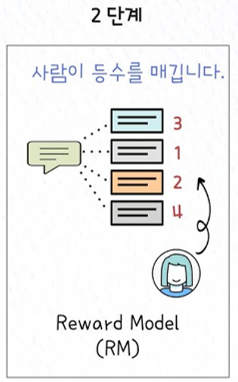

##### 학습용 데이터 만들기

Data Format

data = [{'prompt':"질문", 'chosen':"더 우수한 답변", 'reject':"덜 우수한 답변"}]

In [ ]:
# 39: 위에서 만든 instruction 데이터 읽어오기!!
import json

# 파일 이름 주의!
instruction_data=[]
for a in open("./mygpt-lecture/data/stage1. domain_instruction_tuning/ive_instruction_train.jsonl", 'r'):
    instruction_data.append(json.loads(a))

In [ ]:
# 40: 일단 위에서 만든 데이터에서 질문만 뽑아보자
questions = [a['instruction'] for a in instruction_data]
print("질문 예시:", questions[0])
print("질문 갯수:", len(questions))

In [ ]:
# 41: 질문을 10개 단위로 쪼개기
question_list = ["Q" + str((i%10)+1)+":" + q  for i, q in enumerate(questions)]

question_set =[]
for i in range(0, len(question_list), 10):
    question_set.append("\n".join(question_list[i:i+10]))

print("전체 질문 Set 갯수: ", len(question_set))
print("질문 Set 예시:\n", question_set[0])

In [ ]:
# 42: ChatGPT에게 물어볼 프롬프트 형식

# 좋은 데이터를 만들기 위한 Prompt는 아래와 같았습니다.
# "다음 주제와 내용을 보고 답변 할 수 있는 창의적이고 재밌는 질문과 상세한 정답 쌍을 10개 만들어줘."

# 나쁜 데이터를 만들기 위해 Prompt를 조작해 봅시다!!
PROMPT="지금부터 여러개의 질문이 주어집니다. 주어진 질문들에 대해서 뻔하고 재미없으며 다소 부정확한 답변을 해주세요.\n\
### 질문들 ###\n\
{questions}\n\
-------------------\n\
각 답변은 아래와 같은 형식으로 답변해야 합니다.\n\n\
A1: 답변\n\
A2: 답변\n\
A3: 답변\n\
A4: 답변\n\
A5: 답변\n\
...\n\
A10: 답변"

print(PROMPT.format_map({'questions':question_set[0]}))

In [ ]:
# 43: openai library 설치
!pip install openai

from tqdm import tqdm
from openai import OpenAI
import os
os.environ["OPENAI_API_KEY"] = ""
client = OpenAI()

In [ ]:
# 44: 데이터를 담을 리스트
bad_qa=[]
bad_qa_error=[]

In [ ]:
# 45: ChatGPT API를 통해 데이터 얻어오기

# 중간에 에러가 나면 error_data에 넣어두고, 아래 for_loop의 data -> error_data 로 고쳐서 다시 돌려도 됨!!
# 데이터에 민감 정보가 있을 경우 에러가 날 수 있습니다!!

for questions in tqdm(question_set):
    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
                    {"role": "system", "content": "You are a helpful assistant."},
                    {'role':"user","content": PROMPT.format_map({'questions':questions})}
            ],
            temperature=1
        )

        bad_qa.append({'instruction': questions,  'output':response.choices[0].message.content})
    except Exception as e:
        bad_qa_error.append(a)
        print(e)

In [ ]:
# 46: 데이터가 만들어지는 동안 직접 만들어보기!
hand_written_dataset=[
    {'prompt': '아이브와 아이유의 차이는 무엇인가요?',
    'chosen': '아이브는 2021년 12월 1일에 데뷔한 스타쉽엔터테인먼트 소속의 대한민국 6인조 다국적 걸그룹입니다. 아이유는 개인으로 활동하는 대한민국의 싱어송라이터 입니다.',
     'rejected': '아이브와 아이유는 아씨 성을 가진 자매입니다.'},
    {'prompt': '질문',
    'chosen': '좋은 답변',
     'rejected': '나쁜 답변'}
    #...
]

In [ ]:
print(bad_qa[0]['instruction'])

In [ ]:
print(bad_qa[0]['output'])

In [ ]:
len(bad_qa)

In [ ]:
# 47: 질문과 답변만 뽑자
bad_instruction_data=[]
for x in bad_qa:

    q_s = x['instruction'].replace("\n\n","\n").split("\n")
    a_s = x['output'].replace("\n\n","\n").split("\n")

    for qq, aa in zip(q_s, a_s):
        question = qq.split(":")[1].strip()
        answer = aa.split(":")[1].strip()
        bad_instruction_data.append({"instruction":question, "output": answer})

In [ ]:
# 48: Bad instruction 과 good instruction의 갯수가 같아야 함

assert len(bad_instruction_data)== len(instruction_data) # GPT 답변을 뽑을 때 에러가 나면 답변의 숫자가 다를 수 있음

In [ ]:
# 49: (질문, 좋은 답변, 나쁜 답변)을 묶어서 학습 데이터를 만들자

reward_model_data=[]
for good in instruction_data:
    question = good['instruction']
    good_answer =  good['output']
    for bad in bad_instruction_data:
        if question == bad['instruction']:
            bad_answer = bad['output']
            reward_model_data.append({'prompt': question, 'chosen': good_answer, 'rejected': bad_answer})
            break

print("Total Data Count:", len(reward_model_data))

In [ ]:
# 50: 학습/평가 데이터로 나누기
import random
random.shuffle(reward_model_data)
train_rm = reward_model_data[:-20]
test_rm = reward_model_data[-20:]

In [ ]:
# 51: 저장 (이름 바꿔주세요!!!!)

import json
with open("./mygpt-lecture/data/stage2. RM/ive_train_rm.jsonl" , encoding= "utf-8",mode="w") as file:
	for i in train_rm: file.write(json.dumps(i, ensure_ascii=False) + "\n")

with open("./mygpt-lecture/data/stage2. RM/ive_test_rm.jsonl" , encoding= "utf-8",mode="w") as file:
	for i in test_rm: file.write(json.dumps(i, ensure_ascii=False) + "\n")

##### Reward Model 학습 시작

In [ ]:
# 52: 필수 라이브러리 재설치
!pip install -r ./mygpt-lecture/requirements.txt

In [ ]:
# 53: 필요 라이브러리 mport

import os
import json
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.optim import AdamW

from datasets import load_dataset
from transformers import PreTrainedTokenizerFast

import sys
CODE_PATH="./mygpt-lecture/code/"
if CODE_PATH not in sys.path:
    sys.path.append(CODE_PATH)

from chatgpt.dataset import RewardDataset
from chatgpt.models.base import RewardModel
from chatgpt.trainer import RewardModelTrainer
from chatgpt.trainer.strategies import ColossalAIStrategy, DDPStrategy, NaiveStrategy
from datasets import load_dataset
from chatgpt.models.gpt.gpt_rm import GPTRM

from colossalai.nn.optimizer import HybridAdam

In [ ]:
# 54: Reward Model로 학습시킬 모델 로드
tokenizer = PreTrainedTokenizerFast.from_pretrained("hyunjae/skt-kogpt2-kullm-v2",
                                                    bos_token='</s>', eos_token='</s>', unk_token='<unk>',
                                                    pad_token='<pad>', mask_token='<mask>',
                                                    padding_side="right", model_max_length=512)

model = GPTRM(pretrained="hyunjae/kogpt2_reward_model").to('cuda')

In [ ]:
# 55: Reward Model 학습/테스트 용 데이터 로드
train_rm=[]
for a in open("./mygpt-lecture/data/stage2. RM/ive_train_rm.jsonl", 'r'):
    train_rm.append(json.loads(a))

test_rm=[]
for a in open("./mygpt-lecture/data/stage2. RM/ive_test_rm.jsonl", 'r'):
    test_rm.append(json.loads(a))

In [ ]:
# 56: 데이터 찍어보기
print(train_rm[-1])

# 데이터 크기 찍어보기
print("Train set size:", len(train_rm))
print("Test set size:", len(test_rm))

In [ ]:
# 57: 데이터 전처리

# 질문(prompt)에 System Prompt를 추가합니다.
# 본인이 선택한 도메인에 맞는 System Prompt 입력!!
SYSTEM_PROMPT= "### system: 당신은 아이브 전문가입니다. 아이브에 대한 사용자의 질문에 사실대로 답변하세요.\n### 사용자: {instruction}\n### 응답: "
train = [{'prompt': SYSTEM_PROMPT.format_map({'instruction': a['prompt']}), 'chosen':a['chosen'].strip(), 'rejected':a['rejected'].strip()} for a in train_rm]
test = [{'prompt': SYSTEM_PROMPT.format_map({'instruction': a['prompt']}), 'chosen':a['chosen'].strip(), 'rejected':a['rejected'].strip()} for a in test_rm]
train_dataset = RewardDataset(train, tokenizer, 256)
eval_dataset = RewardDataset(test, tokenizer, 256)

In [ ]:
# 58: 데이터 찍어보기
print("질문:", train[1]['prompt'])
print("정답:", train[1]['chosen'])
print("오답:", train[1]['rejected'])

In [ ]:
# 59: 모델 저장 경로 설정
rm_output_path="./mygpt-lecture/output/rm_model/"
if not os.path.exists(rm_output_path):
    os.makedirs(rm_output_path)

In [ ]:
# 60: Reward Model 학습을 위한 파라미터 설정
strategy = NaiveStrategy()
optim = AdamW(model.parameters(), lr=1e-5)
trainer = RewardModelTrainer(model=model,
                             strategy=strategy,
                             optim=optim,
                             train_dataset=train_dataset,
                             eval_dataset=eval_dataset,
                             batch_size=8,
                             max_epochs=2)

In [ ]:
# 61: Reward Model train 시작
trainer.fit(use_lora=0)

In [ ]:
# 62: 학습이 끝난 Reward Model 저장

model.model.save_pretrained(rm_output_path)  # config.json 생성

In [ ]:
# 63: Test 데이터셋 에 대해 Accuracy 측정해보기

def inference_RM(input_text=None):
    input_ids = tokenizer.encode(input_text, return_tensors='pt').to(torch.cuda.current_device())
    output = model(input_ids)
    output_reward = output.cpu().detach().numpy()[0]
    return output_reward

correct = 0
for a in test:
    input_text = a['prompt'] + a['chosen']
    print("--------------")
    print("@@@ 좋은 답변")
    output_reward_good = inference_RM(input_text=input_text)
    print(input_text)
    print("### 점수:", output_reward_good)

    input_text =a['prompt'] + a['rejected']
    output_reward_bad = inference_RM(input_text=input_text)
    print("@@@ 나쁜 답변")
    print(input_text)
    print("### 점수:", output_reward_bad)

    if output_reward_good > output_reward_bad:
        correct +=1

In [ ]:
# 64: Test 데이터셋에 대한 Accuracy
correct/len(test)

### Stage 3. PPO 학습

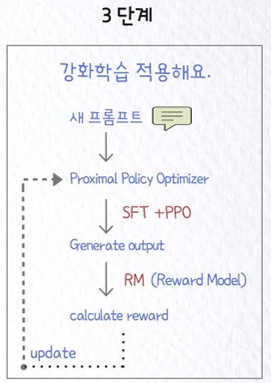

##### PPO용 데이터셋 만들기

질문만 있으면 됨!!

In [ ]:
# 65 (세션이 끊겼으면) 라이브러리 재설치

!pip install openai

In [ ]:
# 66: OpenAI 설정

from openai import OpenAI
import os
os.environ["OPENAI_API_KEY"] = ""
client = OpenAI()

In [ ]:
# 67: 사전학습 데이터 읽어오기

data=[]
for a in open("./mygpt-lecture/data/stage1. domain_adaptive_pretraining/domain_adaptive_ive_pretrain.jsonl", 'r'):
    data.append(json.loads(a))

In [ ]:
# 68: 최대한 다양한 질문을 만들어 낼 수 있는 프롬프트로 작성! 하나의 내용당 20개의 질문 요청

PROMPT="다음 주제와 내용을 보고 답변 할 수 있는 다양한 형태와 난이도의 창의적인 질문 20개를 만들어줘.\n\
\n주제:{title}\n내용:{content}\n\
답변의 형태는 다음과 같아.\n\
--------------\n\
\n\
질문1:\n\
질문2:\n\
질문3:\n\
질문4:\n\
질문5:\n\
...\n\
질문20:\n\
"

In [ ]:
print(PROMPT)

In [ ]:
# 69: 생성한 데이터를 저장할 리스트
question_only_data=[]
error_data=[]

In [ ]:
# 70: API Call

from tqdm import tqdm
for a in tqdm(data):

    title = a['instruction'].split("주제:")[-1]
    content = a['output']
    try:
       response = client.chat.completions.create(
            model='gpt-3.5-turbo',
            messages=[
                {'role':"system","content":"You are a helpful assistant."},
                {'role':"user","content":PROMPT.format_map({'title':title, 'content':content})},
                ],
            temperature=1 # 다양하게 만들기 위해 Temperature 1로 셋팅
        )
       question_only_data.append(response.choices[0].message.content)
    except Exception as e:
        error_data.append(a)
        print(title)
        print(e)

In [ ]:
print(question_only_data[-1])

In [ ]:
# 71: 데이터 전처리

prompt_dataset=[]
for q in question_only_data:
    q_s = q.strip().replace("\n\n","\n").split("\n")
    # 한줄씩 자른 다음, : 기준으로 잘라서 question 뽑기!
    for qq in q_s:
        if "---" in qq:
            continue
        try:
            prompt_dataset.append({'prompt':qq.split(":")[1].lstrip()})
        except Exception as e:
            print(e)
            print(qq)

In [ ]:
# 72: 만들어진 데이터 확인

import random
for a in random.sample(prompt_dataset, 3):
    print(a)

In [ ]:
# 73: Train/Test 분리

random.shuffle(prompt_dataset)
train=prompt_dataset[:-20]
test=prompt_dataset[-20:]

In [ ]:
# 74: 데이터 저장(이름 주의!!!)

import json
with open("./mygpt-lecture/data/stage3. PPO/ive_train_ppo.jsonl" , encoding= "utf-8",mode="w") as file:
	for i in train: file.write(json.dumps(i, ensure_ascii=False) + "\n")

with open("./mygpt-lecture/data/stage3. PPO/ive_test_ppo.jsonl" , encoding= "utf-8",mode="w") as file:
	for i in test: file.write(json.dumps(i, ensure_ascii=False) + "\n")

##### 학습 시작

In [ ]:
# 75: 필수 라이브러리 재설치

!pip install -r ./mygpt-lecture/requirements.txt


In [ ]:
# 76: Torch 버전이 1.13.1 인지 확인 (여전히 2.10으로 표시된다면 '런타임 메뉴' > '런타임 다시시작')

import torch
print("Torch version:{}".format(torch.__version__))
print("cuda version: {}".format(torch.version.cuda))
print("cudnn version:{}".format(torch.backends.cudnn.version()))

In [ ]:
# 77: 강화학습을 위한 라이브러리 Import

import argparse
from copy import deepcopy

import sys
CODE_PATH="./mygpt-lecture/code/"
if CODE_PATH not in sys.path:
    sys.path.append(CODE_PATH)

import pandas as pd
import torch
torch.cuda.empty_cache()
from chatgpt.models.base import RewardModel
from chatgpt.models.gpt import GPTActor, GPTCritic
from chatgpt.trainer import PPOTrainer
from chatgpt.trainer.strategies import ColossalAIStrategy, DDPStrategy, NaiveStrategy
from torch.optim import AdamW
from transformers import PreTrainedTokenizerFast, pipeline

from colossalai.nn.optimizer import HybridAdam
from utils import SFT_dataset, DataCollatorForSupervisedDataset
from typing import Optional, Dict, Sequence
import json, jsonlines, os

In [ ]:
# 78: tokenizer 로드

tokenizer = PreTrainedTokenizerFast.from_pretrained("hyunjae/skt-kogpt2-kullm-v2",
                                                    bos_token='</s>', eos_token='</s>', unk_token='<unk>',
                                                    pad_token='<pad>', mask_token='<mask>',
                                                    padding_side="right", model_max_length=512)

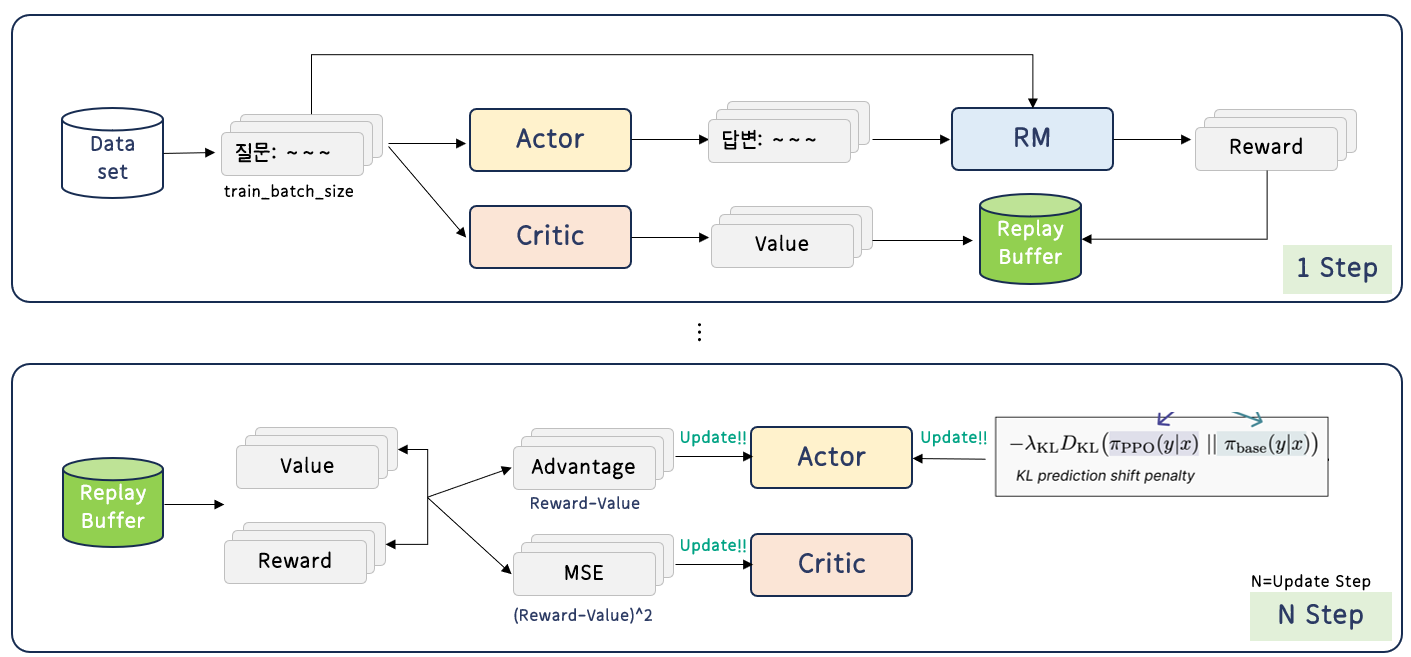

In [ ]:
# 79: 강화학습을 위한 파라미터 설정

# 데이터 경로 확인!!!!!!!
parser = argparse.ArgumentParser()
parser.add_argument('--train_data_path_ppo', type=str, default='./mygpt-lecture/data/stage3. PPO/ive_train_ppo.jsonl') # 강화학습용 학습 데이터
parser.add_argument('--test_data_path_ppo', type=str, default='./mygpt-lecture/data/stage3. PPO/ive_test_ppo.jsonl') # 강화학습용 테스트 데이터
parser.add_argument('--output_dir', type=str, default='./mygpt-lecture/output/PPO_model') # 학습이 끝난 모델이 저장 될 경로
parser.add_argument('--model', type=str, default='gpt2')
parser.add_argument('--pretrain', type=str, default=None)
parser.add_argument('--num_episodes', type=int, default=5)
parser.add_argument('--max_timesteps', type=int, default=6)
parser.add_argument('--update_timesteps', type=int, default=3)
parser.add_argument('--max_epochs', type=int, default=1)
parser.add_argument('--train_batch_size', type=int, default=6)
parser.add_argument('--lora_rank', type=int, default=0) # 0 = 사용안함
parser.add_argument('--max_length', type=int, default=256)
parser.add_argument('--lr', type=float, default=3e-6)

parser.add_argument('--pretrain_actor', type=str, default='./mygpt-lecture/output/domain_instruction_tuning/')  # SFT 모델 가져오기
parser.add_argument('--pretrain_critic', type=str, default='./mygpt-lecture/output/rm_model') # Reward Model 가져오기
args = parser.parse_args(args=[])

print(args)
if not os.path.exists(args.output_dir):
    os.makedirs(args.output_dir)

In [ ]:
# 80: actor, critic, initial model, reward model 로드 및 Configuration
strategy = NaiveStrategy()
with strategy.model_init_context():
    actor = GPTActor(pretrained=args.pretrain_actor).to(torch.cuda.current_device())
    critic = GPTCritic(pretrained=args.pretrain_critic).to(torch.cuda.current_device())
    initial_model = deepcopy(actor)
    reward_model = RewardModel(deepcopy(critic.model), deepcopy(critic.value_head)).to(torch.cuda.current_device())

# configure optimizer
actor_optim = AdamW(actor.parameters(), lr=args.lr)
critic_optim = AdamW(critic.parameters(), lr=args.lr)

# setting the models
(actor, actor_optim), (critic, critic_optim), reward_model, initial_model = strategy.prepare((actor, actor_optim), (critic, critic_optim), reward_model, initial_model)

In [ ]:
# 81: 강화학습용 데이터에 전처리

# 본인의 데이터에 맞게 Prompt 변경!
PROMPT= "### system:당신은 아이브 전문가입니다. 아이브에 대한 사용자의 질문에 대해 사실대로 답변하세요.\n### 사용자:{instruction}\n### 응답:"

train_ppo=[]
for a in open(args.train_data_path_ppo, 'r'):
    train_ppo.append(PROMPT.format_map({'instruction':json.loads(a)['prompt']}))

test_ppo=[]
for a in open(args.test_data_path_ppo, 'r'):
    test_ppo.append(PROMPT.format_map({'instruction':json.loads(a)['prompt']}))

def tokenize_fn(texts):
    batch = tokenizer(texts, return_tensors='pt', max_length=args.max_length, padding=True, truncation=True)
    return {k: v.cuda() for k, v in batch.items()}

In [ ]:
# Dataset Size
print("Train set Size:", len(train_ppo))
print("Test set Size:",len(test_ppo))

In [ ]:
# 데이터 예시(Only 질문만!!)
print(random.sample(train_ppo, 1)[0])

In [ ]:
# 82: configure trainer & 학습 시작
trainer = PPOTrainer(strategy,
                     actor,
                     critic,
                     reward_model,
                     initial_model,
                     actor_optim,
                     critic_optim,
                     max_epochs=args.max_epochs,
                     train_batch_size=6,
                     tokenizer=tokenize_fn,
                     max_length=args.max_length,
                     do_sample=True,
                     temperature=1.0,
                     top_k=50,
                     pad_token_id=tokenizer.pad_token_id,
                     eos_token_id=tokenizer.eos_token_id)

# train!
trainer.fit(train_ppo,  # 입력 prompt
            num_episodes=args.num_episodes,
            max_timesteps=args.max_timesteps,
            update_timesteps=args.update_timesteps)

In [ ]:
# 83: 학습이 끝난 모델 저장

# Actor만 저장합니다!
actor.model.save_pretrained(args.output_dir)

#### SFT vs PPO Inference 비교

In [ ]:
# 84: 두가지 모델로 추론 결과를 뽑습니다. (시간 소요)

generation_args = dict(
    num_beams=4,
    repetition_penalty=2.0,
    no_repeat_ngram_size=4,
    eos_token_id=tokenizer.eos_token_id, # \n
    max_new_tokens=256,
    do_sample=True,
    top_k=50,
    early_stopping=True
)

## PPO (강화학습)
generator_ppo = pipeline('text-generation', model=args.output_dir , tokenizer=tokenizer)
list_result_ppo = generator_ppo(test_ppo, **generation_args)

## SFT (Supervised Fine-tuned Model)
generator_sft = pipeline('text-generation', model=args.pretrain_actor, tokenizer=tokenizer) # Q: SFT를 테스트 해야 하는데 Actor를 왜 넣을까요?
list_result_sft = generator_sft(test_ppo, **generation_args)

In [ ]:
# 85: 강화학습 vs SFT 모델 간 결과 비교

for prompt, ppo_result, sft_result in zip(test_ppo, list_result_ppo, list_result_sft):
    print(('-'*70))
    print(prompt)
    print("PPO: ",ppo_result[0]['generated_text'].replace(prompt,""))
    print("SFT: ",sft_result[0]['generated_text'].replace(prompt,""))

#### [참고] Pipeline 없이 Inference 하는 법

In [ ]:
## inference
def generation(model, input_text):
    input_ids = tokenizer(input_text, return_tensors='pt').to(
        torch.cuda.current_device())

    outputs = model.generate(**input_ids,
                             num_beams=4,
                            repetition_penalty=2.0,
                            no_repeat_ngram_size=4,
                            eos_token_id=tokenizer.eos_token_id,
                            max_new_tokens=256,
                            do_sample=True,
                            top_k=50,
                            early_stopping=True
                             )

    # print(outputs)
    output = tokenizer.batch_decode(outputs, skip_special_tokens=True)
    print('#' * 70)
    print(output)
    return output

from transformers import AutoModelForCausalLM
model = AutoModelForCausalLM.from_pretrained(args.output_dir).to('cuda').eval()

for input_text in test_ppo:
    output = generation(model, input_text)